There are two key implementations of Artificial Intelligence/ Machine Learning for Inventory
Management:
*  1. Demand Prediction for Inventory Management.
*  2. Reinforcement Learning systems for full-inventory management.
*  Since, Reinforcement Learning is a more complex and advanced topic for research, for this
project work we will be sticking with Demand prediction for Inventory Management.


#  Problem Defination

Demand Prediction for Inventory Management:-
As the name suggest, the general idea is to build a time series prediction model that can estimate
what demand will be like for the coming days across all items in your inventory using historical
sales data.

## Algortihms to be used and compared
* 1. LinearRegression
* 2. ElasticNet
* 3. RidgeCV
* 4. Lasso
*  5.DecisionTreeRegressor
*  6.RandomForestRegressor
*  7.GradientBoostingRegressor
*  8.AdaBoostRegressor
*  9.SVR
*  10.LinearSVR
*  11.XGBRegressor
*  12.LGBMRegressor

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_store = pd.read_csv("stores_data_set.csv")
data_feature = pd.read_csv("features_data_set.csv",parse_dates=["Date"])
data_sales = pd.read_csv("sales_data_set.csv",parse_dates=["Date"])

<a id="1"></a> <br>
# Glance of the data

Lets see how the tables look and get some basic information. i.e 
* Data types
* No of Data (rows and column)
* Null Data
* few rows to understand the data

In [3]:
print(data_store.info())
print(data_store.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [4]:
print(data_feature.info())
print(data_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        

In [5]:
print(data_sales.info())
print(data_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False


*  looking into the data we find that we can group data based on the time,store,department.
*  Also we can check how holiday,Temperature,Fuel Price,CPI,Unemployment,Type of Store affecting sales.

<a id="2"></a> <br>
# **Analysis Datewise**

let explore data based on the timeline

* lets Merge Feature tables and sales tables based on the date 
* we will convert WeeklySales in Millions
* we will modify column as the day is holiday or not

In [6]:
data_date = data_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = data_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )


In [7]:
print(data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean      46.601399    60.663782    3.358607  171.578394      7.999151
std        5.399713    15.172792    0.429401    3.100148      0.483853
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.720222    2.885367  168.408144      7.508333
50%       46.000000    61.051111    3.488644  171.386189      8.150133
75%       47.000000    74.697333    3.726133  174.724576      8.428578
max       80.000000    82.176444    3.997778  176.652613      8.619311


<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

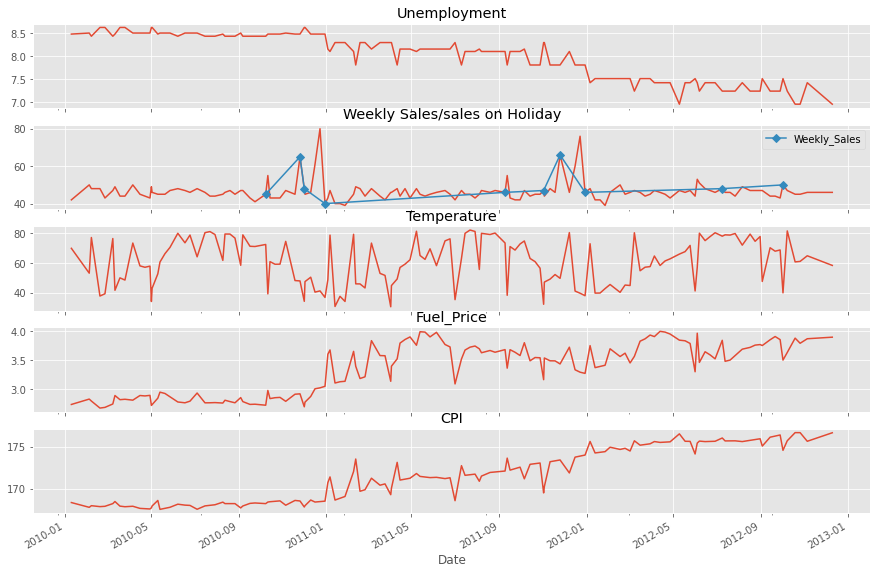

In [8]:
plt.style.use('ggplot')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[1],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[1],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[2], title="Temperature")
data["Fuel_Price"].plot(ax=ax[3],title="Fuel_Price")
data["CPI"].plot(ax=ax[4],title="CPI")
data["Unemployment"].plot(ax=ax[0],title="Unemployment")



* November - december ther is spike in weekly sales, average is same for the rest of the year.
* Weeks nearby holiday shows peak
* Fuel Price and Consumer Price Index shown growth over the year.
* Unemployment decreased year after year.
* Temperature is showing a random walk


<AxesSubplot:>

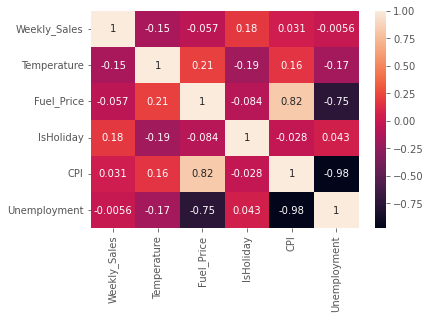

In [9]:
sns.heatmap(data.corr(),annot=True)

* Weekly sales doesnot show any high correlation with any other parameters.
* CPI and Unemployment  shows negative correlation on other hand Fuel Price show positive correlation
* Unemployment and Fuel price are also negatively correlated

Text(0, 0.5, 'Sales')

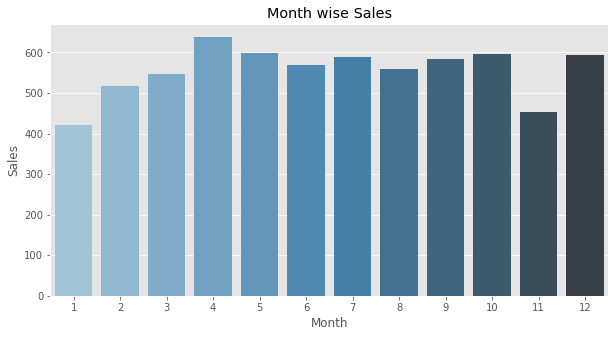

In [10]:

data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales, palette="Blues_d")
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

* It could be as Enough buying during offer and holidays (Black friday Sales,Chrismas,New year) and later sales go down and then again gaining momentum in some months.
* In Nov also people show less buying can be waiting period for upcoming sales.
* whole data for Dec-2013 I guess is not available so even after spike in Dec the sales are not gone very high.

Text(0, 0.5, 'Sales')

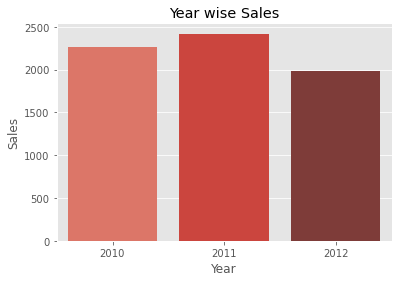

In [11]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales,  palette="Reds_d")
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")


<a id="3"></a> <br>
# **Analysis Storewise**

lets explore the pattern in store for weekly sales data

In [12]:
data_Store = data_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})
temp_store = data_sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
data_store["temp"] = data_Store.Temperature
data_store["Fuel_Price"] = data_Store.Fuel_Price
data_store["holiday"] = data_Store.IsHoliday
data_store["Weekly_Sales"] = temp_store.Weekly_Sales

In [13]:
data_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

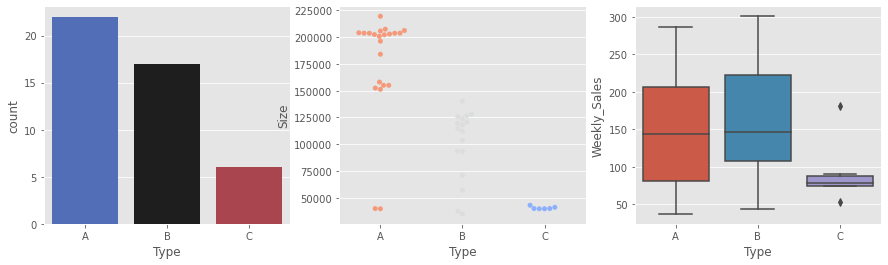

In [14]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(data_store.Type,ax=ax[0], palette= 'icefire' )
sns.swarmplot(data = data_store,y="Size",x="Type",ax=ax[1], palette= "coolwarm_r")

sns.boxplot(data = data_store,y="Weekly_Sales",x="Type",ax=ax[2], )



* Store Count is in the order of A, B and least is C 
* Size wise A store as most no of Item followed by B and than C
* Even After less Count of Store and lesser Size B has more Weekly Sales than A and C at the least.

<a id="4"></a> <br>
# **Analysis Departmentwise**

A little Invesigation on Department

In [15]:
len(data_sales["Dept"].unique())

81

In [16]:
data_Dept = data_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Department')

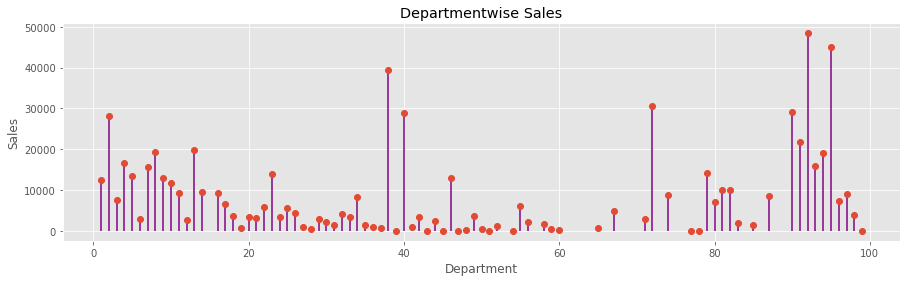

In [17]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='purple')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o", )
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

* Here  we can see department 1-15 as well as 90-95 has shown  higher weekly sales.
* some department as 38,40,72 has shown higher weekly sales.

<a id="5"></a> <br>
# Analysis Store Type and Year/Month Wise 

In [18]:
sales_date_store = data_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(data_feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,data_store[["Store","Type"]] ,  how='left', on=["Store"])
pd.to_datetime(data_table['Date'])
data_table.head()
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

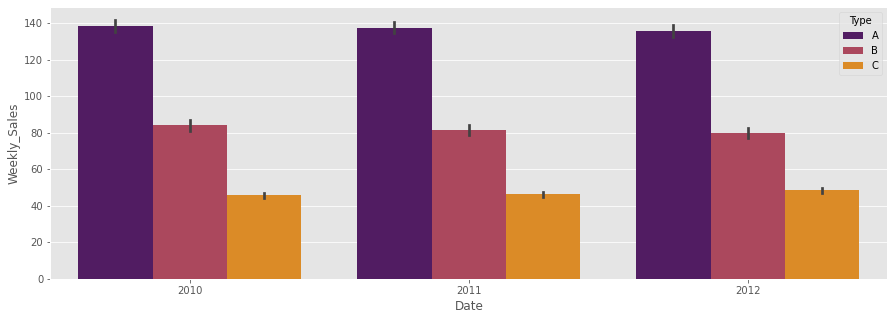

In [19]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales, palette= "inferno", hue=data_train.Type)

* Store Type A & B has shown slight decrease year on basis in sales.
* Store C has shown a slight increase in sales.

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

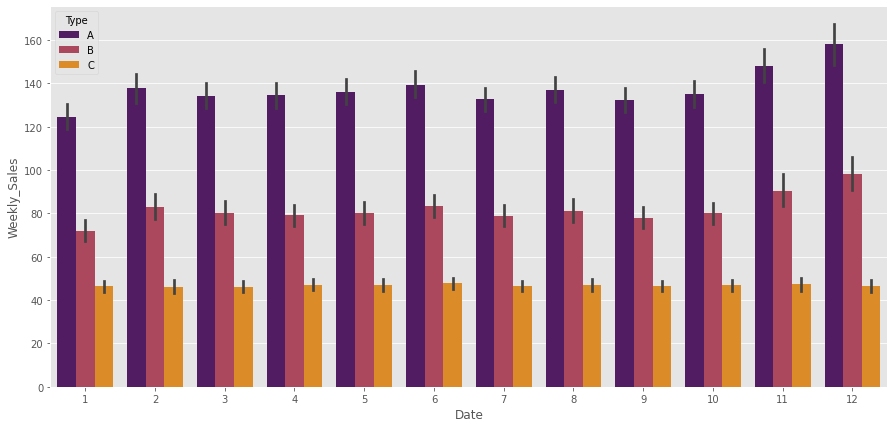

In [20]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type, palette= "inferno")

* Type A & B store show spike in Nov Dec mostly due to holiday whereas jan has shown decrease in sale.
* Type C is consistent over every month and doesnot show much deviation.
   

<a id="7"></a> <br>
# **Prediction on Date and Store**

In [21]:

from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

**Clean up and preprocessing**

In [22]:
def createdummies(data,cols):
    for col in cols:
        one_hot = pd.get_dummies(data[col],prefix=col)
        data = data.join(one_hot)
        data.drop(col,axis = 1,inplace=True)
    
    return data
        

In [23]:

# imputing the missing value
itt = IterativeImputer()
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]

data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

#create new column
pd.to_datetime(data_table['Date'])
data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table.head()
# data_table["WeekofYear"] = data_table.Date.dt.weekofyear
data_table.drop(['Date'],axis=1,inplace= True)

# create dummies out of categorical column
data_table = createdummies(data_table,["Type","Month","Year"])



In [24]:
data_table.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type_A', 'Type_B', 'Type_C', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013'],
      dtype='object')

**Data Split**

In [25]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Basic Model Creation**

In [26]:



classifiers = [
    LinearRegression(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(), 
    LinearSVR(), 
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


**Comparing Model Performance**

In [27]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'], ascending= False,inplace=True)
df_score

,rmse,score,model
name,,,
XGBRegressor,10.606740,0.963732,"XGBRegressor(base_score=0.5, booster='gbtree',..."
LGBMRegressor,10.692344,0.963144,LGBMRegressor()
RandomForestRegressor,14.592190,0.931356,"(DecisionTreeRegressor(max_features='auto', ra..."
GradientBoostingRegressor,16.214722,0.915242,([DecisionTreeRegressor(criterion='friedman_ms...
DecisionTreeRegressor,19.455922,0.877971,DecisionTreeRegressor()
AdaBoostRegressor,35.415617,0.595657,"(DecisionTreeRegressor(max_depth=3, random_sta..."
LinearRegression,39.247236,0.503432,LinearRegression()
RidgeCV,39.247557,0.503424,"RidgeCV(alphas=array([0.001, 0.01 , 0.1 , 1. ..."
ElasticNet,42.829383,0.408651,ElasticNet(alpha=0.8)


**Prediction**

In [28]:
model = df_score.loc["XGBRegressor","model"]
predict = model.predict(X_test)
predict

array([214.39821 ,  57.155132, 103.225586, ..., 153.90312 , 115.75647 ,
        35.398285], dtype=float32)